<a href="https://colab.research.google.com/github/srivishnu2805/Machine_Learning-23249-/blob/main/KNN/KNN_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

data = {
    'Brightness': [40, 50, 60, 10, 70, 60, 25],
    'Saturation': [20, 50, 90, 25, 70, 10, 80],
    'Class': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue']
}

df = pd.DataFrame(data)
print("Dataset:\n", df)

X = df[['Brightness', 'Saturation']]
y = df['Class']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

new_entry = pd.DataFrame([[55, 60]], columns=['Brightness', 'Saturation'])
prediction = knn.predict(new_entry)

print("\nNew Entry:\n", new_entry)
print("Predicted Class:", prediction[0])

Dataset:
    Brightness  Saturation Class
0          40          20   Red
1          50          50  Blue
2          60          90  Blue
3          10          25   Red
4          70          70  Blue
5          60          10   Red
6          25          80  Blue

New Entry:
    Brightness  Saturation
0          55          60
Predicted Class: Blue


In [2]:
# --- Function for Euclidean distance ---
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

print("\nDistances from new entry to each existing point:")
for i, row in df.iterrows():
    existing_point = np.array([row['Brightness'], row['Saturation']])
    dist = euclidean_distance(new_entry, existing_point)
    print(f"Distance to {existing_point} ({row['Class']}): {dist:.2f}")


Distances from new entry to each existing point:
Distance to [40 20] (Red): 42.72
Distance to [50 50] (Blue): 11.18
Distance to [60 90] (Blue): 30.41
Distance to [10 25] (Red): 57.01
Distance to [70 70] (Blue): 18.03
Distance to [60 10] (Red): 50.25
Distance to [25 80] (Blue): 36.06


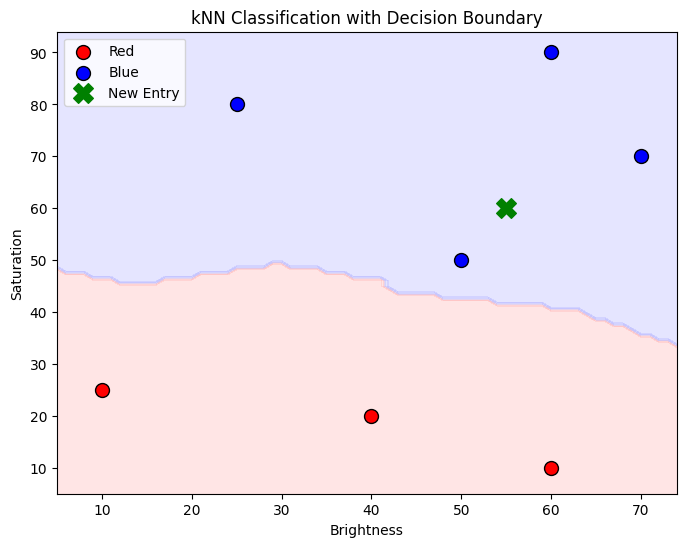

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

h = 1
x_min, x_max = X['Brightness'].min() - 5, X['Brightness'].max() + 5
y_min, y_max = X['Saturation'].min() - 5, X['Saturation'].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Brightness', 'Saturation'])
Z = knn.predict(meshgrid_df)
Z = Z.reshape(xx.shape)

label_map = {'Red': 0, 'Blue': 1}
Z_numeric = np.array([label_map[label] for label in Z.ravel()]).reshape(xx.shape)


cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = {'Red': 'red', 'Blue': 'blue'}

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.3, cmap=cmap_light)

for i, row in df.iterrows():
    plt.scatter(row['Brightness'], row['Saturation'],
                color=cmap_bold[row['Class']], edgecolor='k', s=100, label=row['Class'] if i < 2 else "")

plt.scatter(new_entry['Brightness'], new_entry['Saturation'],
            color='green', marker='X', s=200, label='New Entry')

plt.xlabel("Brightness")
plt.ylabel("Saturation")
plt.title("kNN Classification with Decision Boundary")
plt.legend()
plt.show()